In [22]:
# Predicting if the smokers can develop cancer or not using logistic regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Smoker_dataset.csv')
df.head()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,type,Condition
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,Smoker,Cancer
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,Smoker,Cancer
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,Smoker,Normal
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,Smoker,Cancer
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,Smoker,Cancer


In [3]:
df.shape

(1023, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gene2337   1022 non-null   float64
 1   Gene35715  1020 non-null   float64
 2   Gene12936  1020 non-null   float64
 3   Gene1689   1020 non-null   float64
 4   FGFR1      1021 non-null   float64
 5   GATA4      1021 non-null   float64
 6   type       1023 non-null   object 
 7   Condition  1023 non-null   object 
dtypes: float64(6), object(2)
memory usage: 64.1+ KB


In [5]:
df.isnull().sum()

Gene2337     1
Gene35715    3
Gene12936    3
Gene1689     3
FGFR1        2
GATA4        2
type         0
Condition    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Gene2337     0
Gene35715    0
Gene12936    0
Gene1689     0
FGFR1        0
GATA4        0
type         0
Condition    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['Condition']=le.fit_transform(df['Condition']) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gene2337   1012 non-null   float64
 1   Gene35715  1012 non-null   float64
 2   Gene12936  1012 non-null   float64
 3   Gene1689   1012 non-null   float64
 4   FGFR1      1012 non-null   float64
 5   GATA4      1012 non-null   float64
 6   type       1012 non-null   int64  
 7   Condition  1012 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 67.2 KB


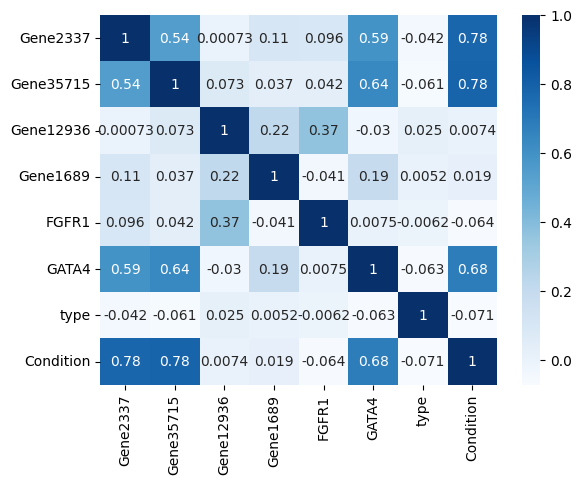

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [14]:
df.columns

Index(['Gene2337', 'Gene35715', 'Gene12936', 'Gene1689', 'FGFR1', 'GATA4',
       'type', 'Condition'],
      dtype='object')

In [16]:
x = df.drop(['Condition'],axis=1)
y = df['Condition']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=32)

In [19]:
from sklearn.linear_model import LogisticRegression 
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = lgr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred) * 100
acc_score

99.01477832512316